In [121]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [122]:
#http://powderlin.es/api.html for api information
snow_api = 'http://api.powderlin.es/'
stations = requests.get(snow_api+'stations')

In [123]:
# Importing stations
df_stations = pd.DataFrame.from_records(stations.json())
num_stations = df_stations.shape[0]

# Removing location for clean up
location = df_stations['location']
df_stations = df_stations.drop(columns=['location'])
num_stations = df_stations.shape[0]

# Cleaning up location
lat = []
lng = []
for i in location:
    lat.append(i['lat'])
    lng.append(i['lng'])

# Concatonating to df_stations
df_stations['lat'] = lat 
df_stations['lng'] = lng

# Results
print(f'There are {num_stations} stations in database.')
df_stations.head(10)

There are 867 stations in database.


,elevation,name,timezone,triplet,wind,lat,lng
0,8777,BEAR RIVER RS,-7,992:UT:SNTL,False,40.88520,-110.82770
1,5130,PARADISE,-8,679:WA:SNTL,False,46.78265,-121.74765
2,4890,GERBER RESERVOIR,-8,945:OR:SNTL,False,42.20620,-121.13340
3,9820,GUNSIGHT PASS,-7,944:WY:SNTL,False,43.38332,-109.87815
4,10966,LAKEFORK BASIN,-7,567:UT:SNTL,False,40.73783,-110.62087
5,7850,BEAVER CREEK,-7,328:MT:SNTL,False,44.94966,-111.35852
6,8968,CAMP JACKSON,-7,383:UT:SNTL,False,37.81333,-109.48723
7,6780,PATTON MEADOWS AM,-8,1241:OR:SNTLT,False,42.24522,-120.60527
8,9105,SQUAW SPRINGS,-7,1156:UT:SNTL,False,38.49730,-112.00789
9,6720,PINE CREEK PASS,-7,695:ID:SNTL,False,43.56998,-111.21157


In [124]:
num_days = 100

for i in range(num_stations):

    # Grab all sites in stations for the past num_days
    site = requests.get(snow_api + 'station/' + stations.json()[i]['triplet'], params={'days':num_days}).json() 
    break # had some error on the 3rd or 4th station... Ill fix it later

    # Extracting the data and storing it into a dataframe
    data = site['data']
    df_site = pd.DataFrame.from_records(data)

    # ========== How to encode/store data for model? -> Model dependent! ==============
    # Concatonating the sites along axis = 0
    # Store into Pickle file
    # Store into separate files

In [125]:
# df_site is first site (we will test with this for now)
df_site = pd.DataFrame.from_records(data)
df_site.head(10)

,Date,Snow Water Equivalent (in),Change In Snow Water Equivalent (in),Snow Depth (in),Change In Snow Depth (in),Observed Air Temperature (degrees farenheit)
0,2020-11-23,3.4,0.0,16,0,21
1,2020-11-24,3.4,0.0,16,0,10
2,2020-11-25,3.4,0.0,16,0,17
3,2020-11-26,3.4,0.0,16,0,14
4,2020-11-27,3.4,0.0,15,-1,7
5,2020-11-28,3.5,0.1,16,1,26
6,2020-11-29,3.5,0.0,16,0,13
7,2020-11-30,3.5,0.0,16,0,22
8,2020-12-01,3.5,0.0,15,-1,13
9,2020-12-02,3.5,0.0,14,-1,8


In [126]:
# Store features into their own dataframe
snow_water_equivalent = df_site['Snow Water Equivalent (in)']
change_snow_water_equivalent = df_site['Change In Snow Water Equivalent (in)']
snow_depth = df_site['Snow Depth (in)']
change_snow_depth = df_site['Change In Snow Depth (in)']
air_temp = df_site['Observed Air Temperature (degrees farenheit)']

Text(0.5, 1.0, 'Air Temperature (F)')

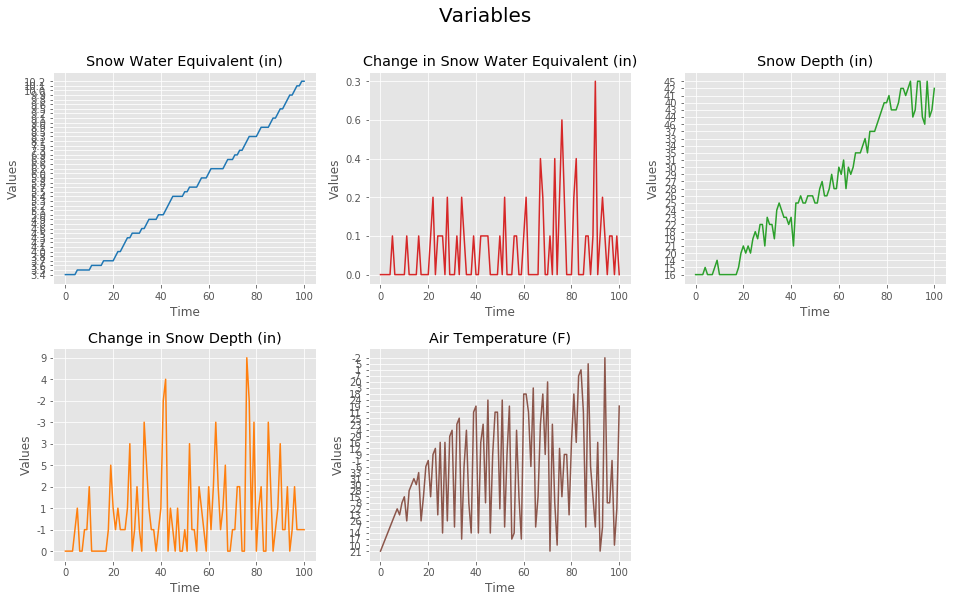

In [127]:
# Setting up figure
fig, axs = plt.subplots(2, 3,figsize=(16,9))
fig.delaxes(axs[1,2])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
fig.suptitle('Variables', fontsize=20)

# SWE
axs[0,0].plot(snow_water_equivalent, c='tab:blue')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('Values')
axs[0,0].set_title('Snow Water Equivalent (in)')

# Change in SWE
axs[0,1].plot(change_snow_water_equivalent, c='tab:red')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('Values')
axs[0,1].set_title('Change in Snow Water Equivalent (in)')

# Snow Depth
axs[0,2].plot(snow_depth, c='tab:green')
axs[0,2].set_xlabel('Time')
axs[0,2].set_ylabel('Values')
axs[0,2].set_title('Snow Depth (in)')

# Change in Snow Depth
axs[1,0].plot(change_snow_depth, c='tab:orange')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('Values')
axs[1,0].set_title('Change in Snow Depth (in)')

# Air Temperature
axs[1,1].plot(air_temp, c='tab:brown')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('Values')
axs[1,1].set_title('Air Temperature (F)')

# ====== To Do ======
# 1) change tick spacing to look better
# 2) Include dates instead of number of past days on graph
# 3) Wrap the above code into a function for modularity
# 4) Wrap our variables into an array so we can use add_subplot and a loop (removes redundant code)